In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [2]:
model = YOLO("./fine_tune/bounding_box.pt")

In [4]:
res = model.predict('C://ML Resume//License plate recognition//dataset//train//images//AQUA5_26144_checkin_2020-10-23-17-140HcLE8JWTi_jpg.rf.013f68954bfd36cf1adaf317099db3a1.jpg')


image 1/1 C:\ML Resume\License plate recognition\dataset\train\images\AQUA5_26144_checkin_2020-10-23-17-140HcLE8JWTi_jpg.rf.013f68954bfd36cf1adaf317099db3a1.jpg: 640x416 6 plates, 44.1ms
Speed: 3.0ms preprocess, 44.1ms inference, 89.2ms postprocess per image at shape (1, 3, 640, 416)


In [5]:
for rs in res:
    for box in rs.boxes:
        print(box.conf)

tensor([0.6479], device='cuda:0')
tensor([0.5100], device='cuda:0')
tensor([0.4213], device='cuda:0')
tensor([0.3705], device='cuda:0')
tensor([0.3658], device='cuda:0')
tensor([0.2589], device='cuda:0')


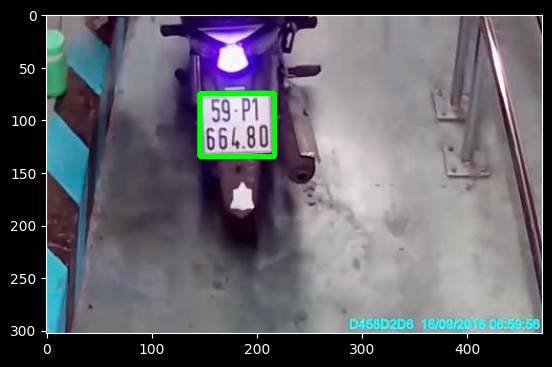

In [13]:
im = 'C://ML Resume//License plate recognition//yolo-plate.v4i.yolov11//train//images//0000_00532_b_jpg.rf.3f614b36675efe766111a92797069774.jpg'

im = cv2.imread(im)

for rs in res:
    for box in rs.boxes:
        if(box.conf[0] < .8): continue
        xyxy = box.xyxy[0]
        xyxy = xyxy.cpu().numpy()
        cv2.rectangle(im, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 4)

plt.imshow(im);